In [6]:
import re
import os
import numpy as np
import pandas as pd
%matplotlib inline
import math
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords


def tokenizador(text):
    text = text.lower()
    intab = "áéíóú"
    outtab = "aeiou"
    str = text
    trantab = str.maketrans(intab, outtab)
    normalizado = str.translate(trantab)
    normalizado = re.sub(r'[^a-z0-9 ]','', normalizado)
    tokens = normalizado.split(" ")
    if "" in tokens:
        while "" in tokens:
            tokens.remove("")
    return tokens

def contador(terms, tokens):
    for token in tokens:
        if token in terms:
            terms[token]["cf"] += 1
        else:
            terms[token] = {"cf": 1}
    return terms

terms = {}
termsAux = {}
with open("Quijote.txt") as archivo:
    for linea in archivo:
        tokens=tokenizador(linea)
        termsAux = contador(termsAux,tokens)
for termAux in termsAux:
    if termAux in terms:
        terms[termAux]["cf"] += termsAux[termAux]["cf"]
        terms[termAux]["df"] += 1
    else:
        terms[termAux] = {"cf": termsAux[termAux]["cf"],"df": 1}

sorted_terms = sorted(terms.items(), key=lambda item: item[1].get("cf", 0), reverse=True)



FileNotFoundError: [Errno 2] No such file or directory: 'Quijote.txt'

In [ ]:
datos={"words":[],"rank":[],"freq":[]}
rank = 1
terms_total = 0
with open("terminosQuijote.txt", "w") as f:
    for term, info in sorted_terms:
        datos["words"].append(term)
        datos["rank"].append(rank)
        datos["freq"].append(info['cf'])
        rank += 1
        terms_total += info['cf']
        f.write(f"{term} {info['cf']} {info['df']}\n")

df = pd.DataFrame(datos)
x = np.log(datos["rank"])
y = np.log(datos["freq"])
fit = np.polyfit(x,y,1)
polynomial = np.poly1d(fit)
y_estimated = np.exp(polynomial(x))


In [ ]:
df = pd.DataFrame(datos)
print(df)

            words   rank   freq
0             que      1  21616
1              de      2  18495
2               y      3  18271
3              la      4  10492
4               a      5   9933
...           ...    ...    ...
23170    includes  23171      1
23171     produce  23172      1
23172   subscribe  23173      1
23173  newsletter  23174      1
23174        hear  23175      1

[23175 rows x 3 columns]


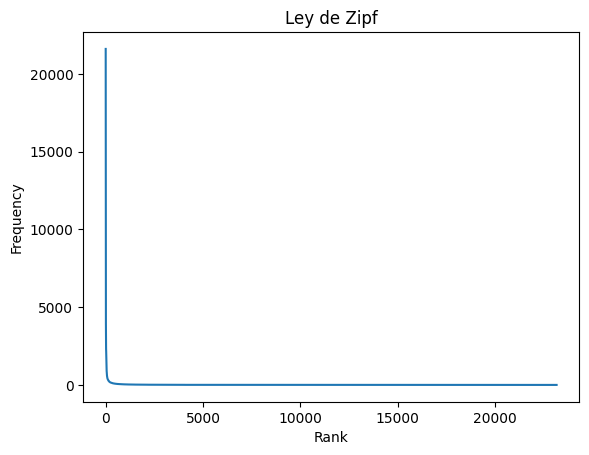

In [ ]:
plt.plot(df["rank"],df["freq"], linestyle='solid')
plt.title('Ley de Zipf')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()


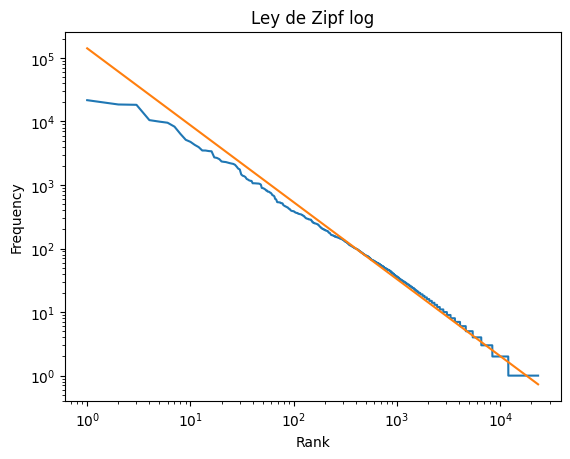

In [ ]:
plt.loglog(df["rank"],df["freq"], linestyle='solid')
plt.loglog(df["rank"],y_estimated, linestyle='solid', label = "estimado")
plt.title('Ley de Zipf log')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()



In [ ]:
terms_10por = int(0.1*terms_total)
terms_20por = int(0.2*terms_total)
terms_30por = int(0.3*terms_total)
terms_10 = []
terms_20 = []
terms_30 = []
print(terms_10por)

NameError: name 'terms_total' is not defined

In [ ]:
for term, info in sorted_terms:
    if terms_10por>0:
        terms_10.append(term)
        terms_10por -=info["cf"]
    if terms_20por>0:
        terms_20.append(term)
        terms_20por -=info["cf"]
    if terms_30por>0:
        terms_30.append(term)
        terms_30por -=info["cf"]
stops = set(stopwords.words('spanish'))

cant_term10 = len(terms_10)
cant_term20 = len(terms_20)
cant_term30 = len(terms_30)

pruning_10_percent = 0
pruning_20_percent = 0
pruning_30_percent = 0

print(terms_10)
print(terms_20)
print(terms_30)

pruning_terms_10 = []
pruning_terms_20 = []
pruning_terms_30 = []

for term in terms_10:
    if term in stops:
        pruning_10_percent += 1
    else: 
        pruning_terms_10.append(term)

for term in terms_20:
    if term in stops:
        pruning_20_percent += 1
    else: 
        pruning_terms_20.append(term)

for term in terms_30:
    if term in stops:
        pruning_30_percent += 1
    else: 
        pruning_terms_30.append(term)

pruning_terms_10.extend(term for term in terms_10 if term not in stops)
pruning_terms_20.extend(term for term in terms_20 if term not in stops)
pruning_terms_30.extend(term for term in terms_30 if term not in stops)

print("porcentaje de la poda coincide con palabras vacías 10%", pruning_10_percent/cant_term10*100)
print(terms_10)
print(pruning_terms_10)
print("porcentaje de la poda coincide con palabras vacías 20%", pruning_20_percent/cant_term20*100)
print(terms_20)
print(pruning_terms_20)
print("porcentaje de la poda coincide con palabras vacías 30%", pruning_30_percent/cant_term30*100)
print(terms_30)
print(pruning_terms_30)

['que', 'de']
['que', 'de', 'y', 'la', 'a']
['que', 'de', 'y', 'la', 'a', 'el', 'en', 'no', 'se', 'los', 'con']
porcentaje de la poda coincide con palabras vacías 10% 100.0
['que', 'de']
[]
porcentaje de la poda coincide con palabras vacías 20% 100.0
['que', 'de', 'y', 'la', 'a']
[]
porcentaje de la poda coincide con palabras vacías 30% 100.0
['que', 'de', 'y', 'la', 'a', 'el', 'en', 'no', 'se', 'los', 'con']
[]
